# Chronic kidney disease classification
This notebook follows a standard machine learning workflow, to classify disease detection in kidney, based on certain features, discussed below.
Data: https://www.kaggle.com/datasets/amanik000/kidney-disease-dataset/data

In [1]:
# load the dataset
import pandas as pd
df = pd.read_csv("../data/kidney_disease_dataset.csv")

# Explarotary Data Analysis

In [2]:
# check the first few rows
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)',
       'Coronary artery disease (yes/no)', 'Appetite (good/poor)',
       'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Family history of chronic kidney disease', 'Smoking status',
       'Physical activity level', 'Urinary sediment microscopy results',
       'Target'],
      dtype='object')


## Missing values
1. EDA is generally done firstly without splitting the data.
2. If we do find missing values we do not impute them, we check for distributions and then apply splitting then we do transformations in train data and then apply those techniques in the test data.

<Axes: >

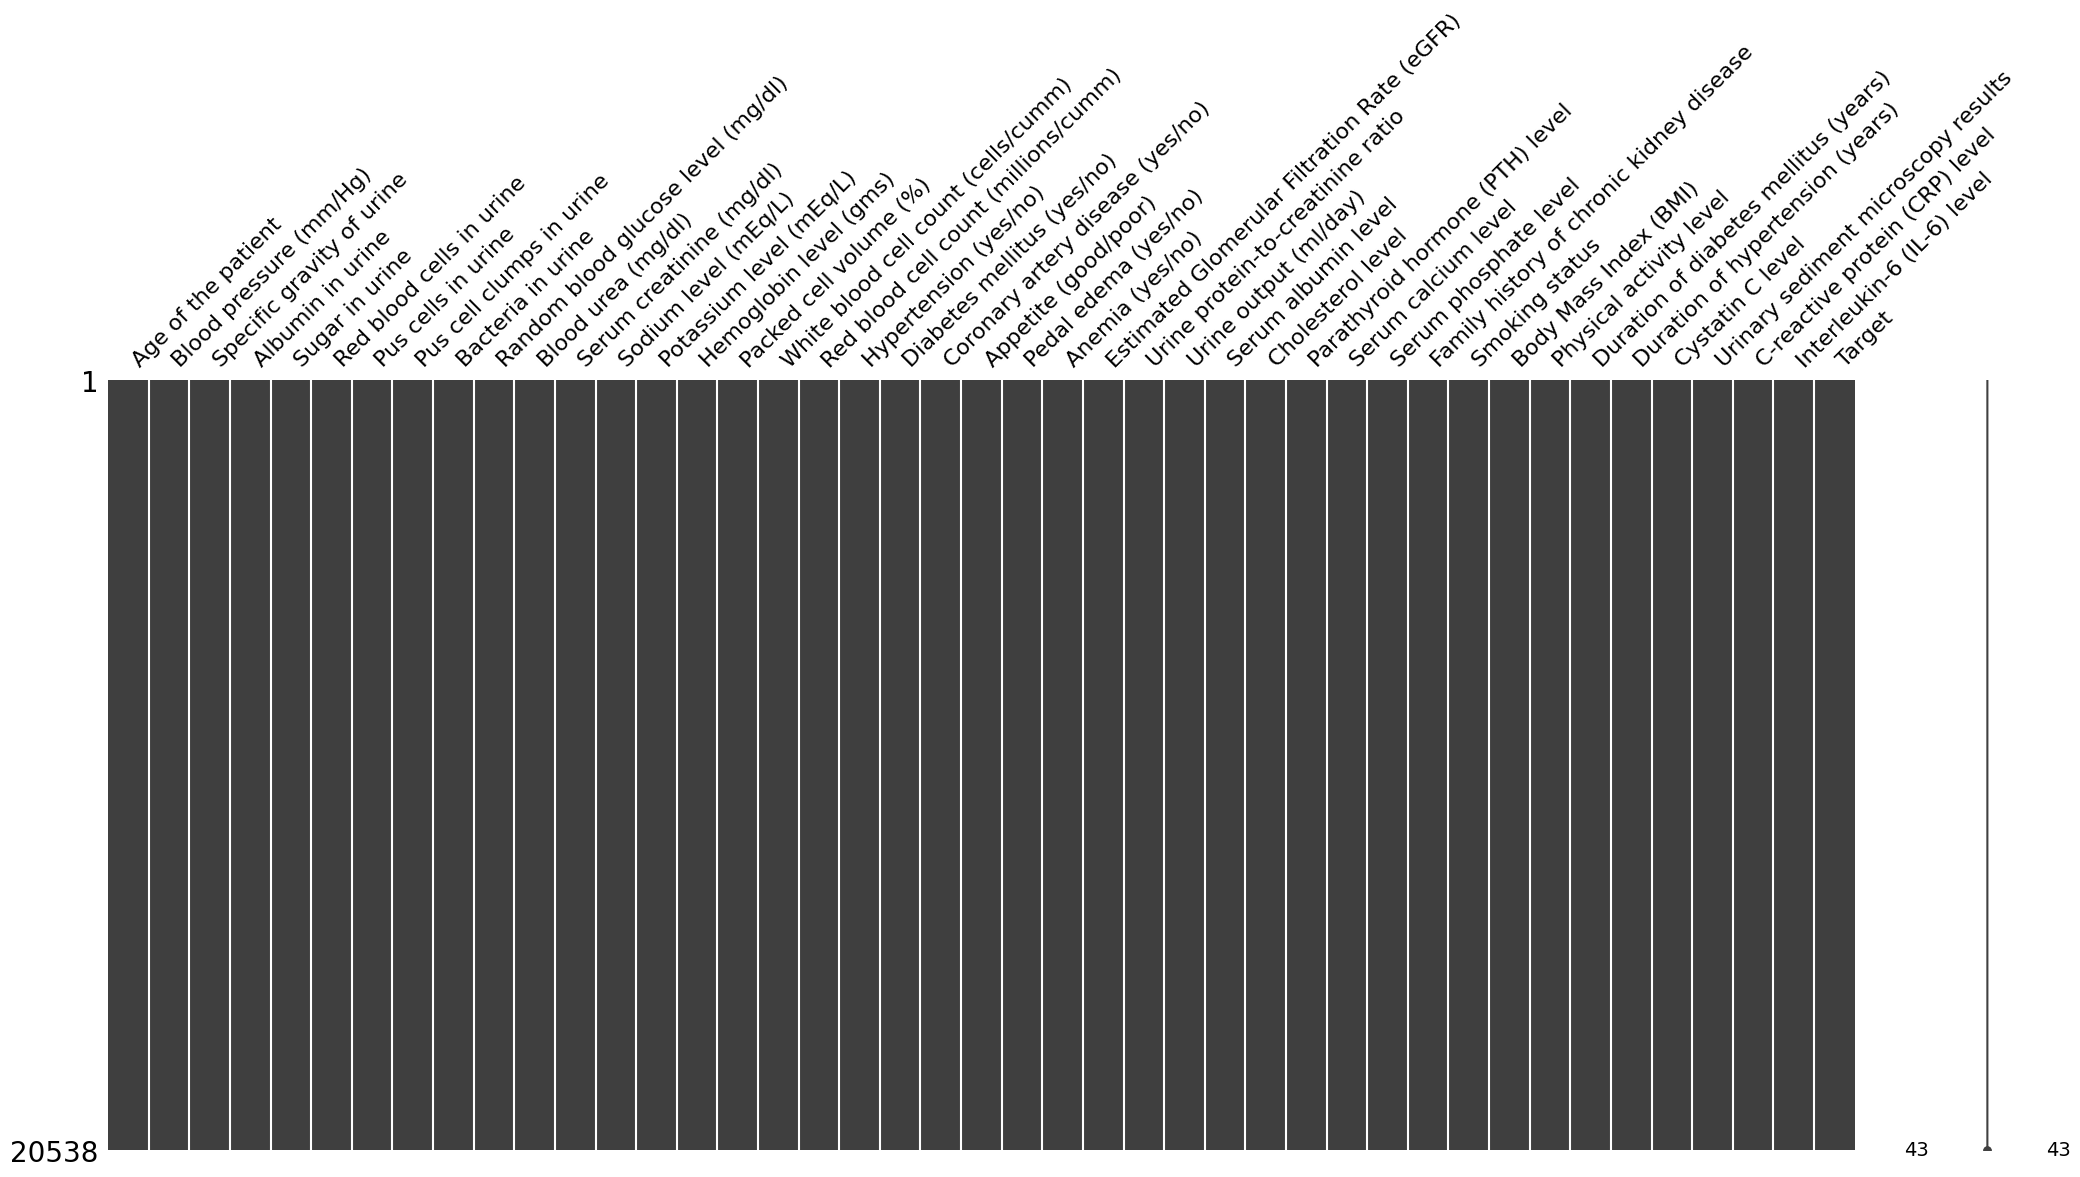

In [4]:
import missingno as msno
# visualize the missing values
msno.matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

### The dataset is fairly clean and no missing values present.

## Checking for distributions in numerical features

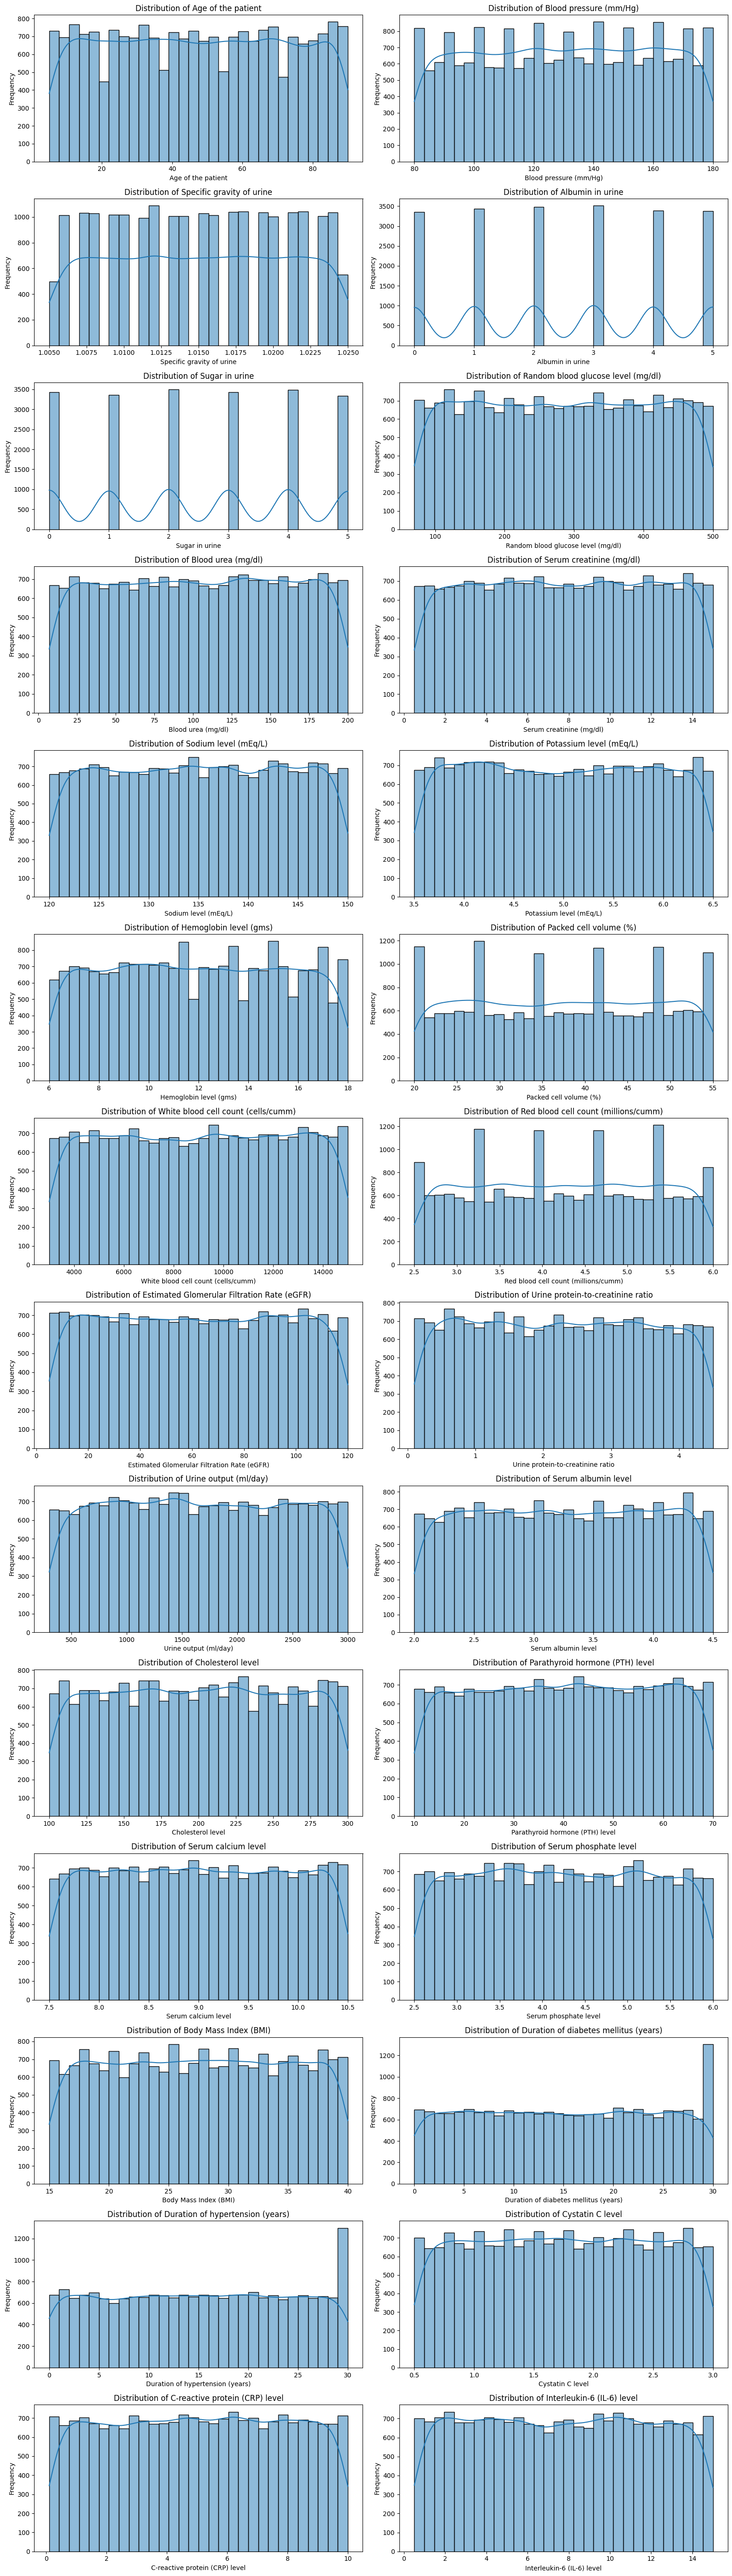

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create distribution plots in two columns
num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(16, num_features * 2))

for i, feature in enumerate(numerical_features):
    ax = axes[i // 2, i % 2]
    sns.histplot(df[feature], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    # Hide any unused subplots
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


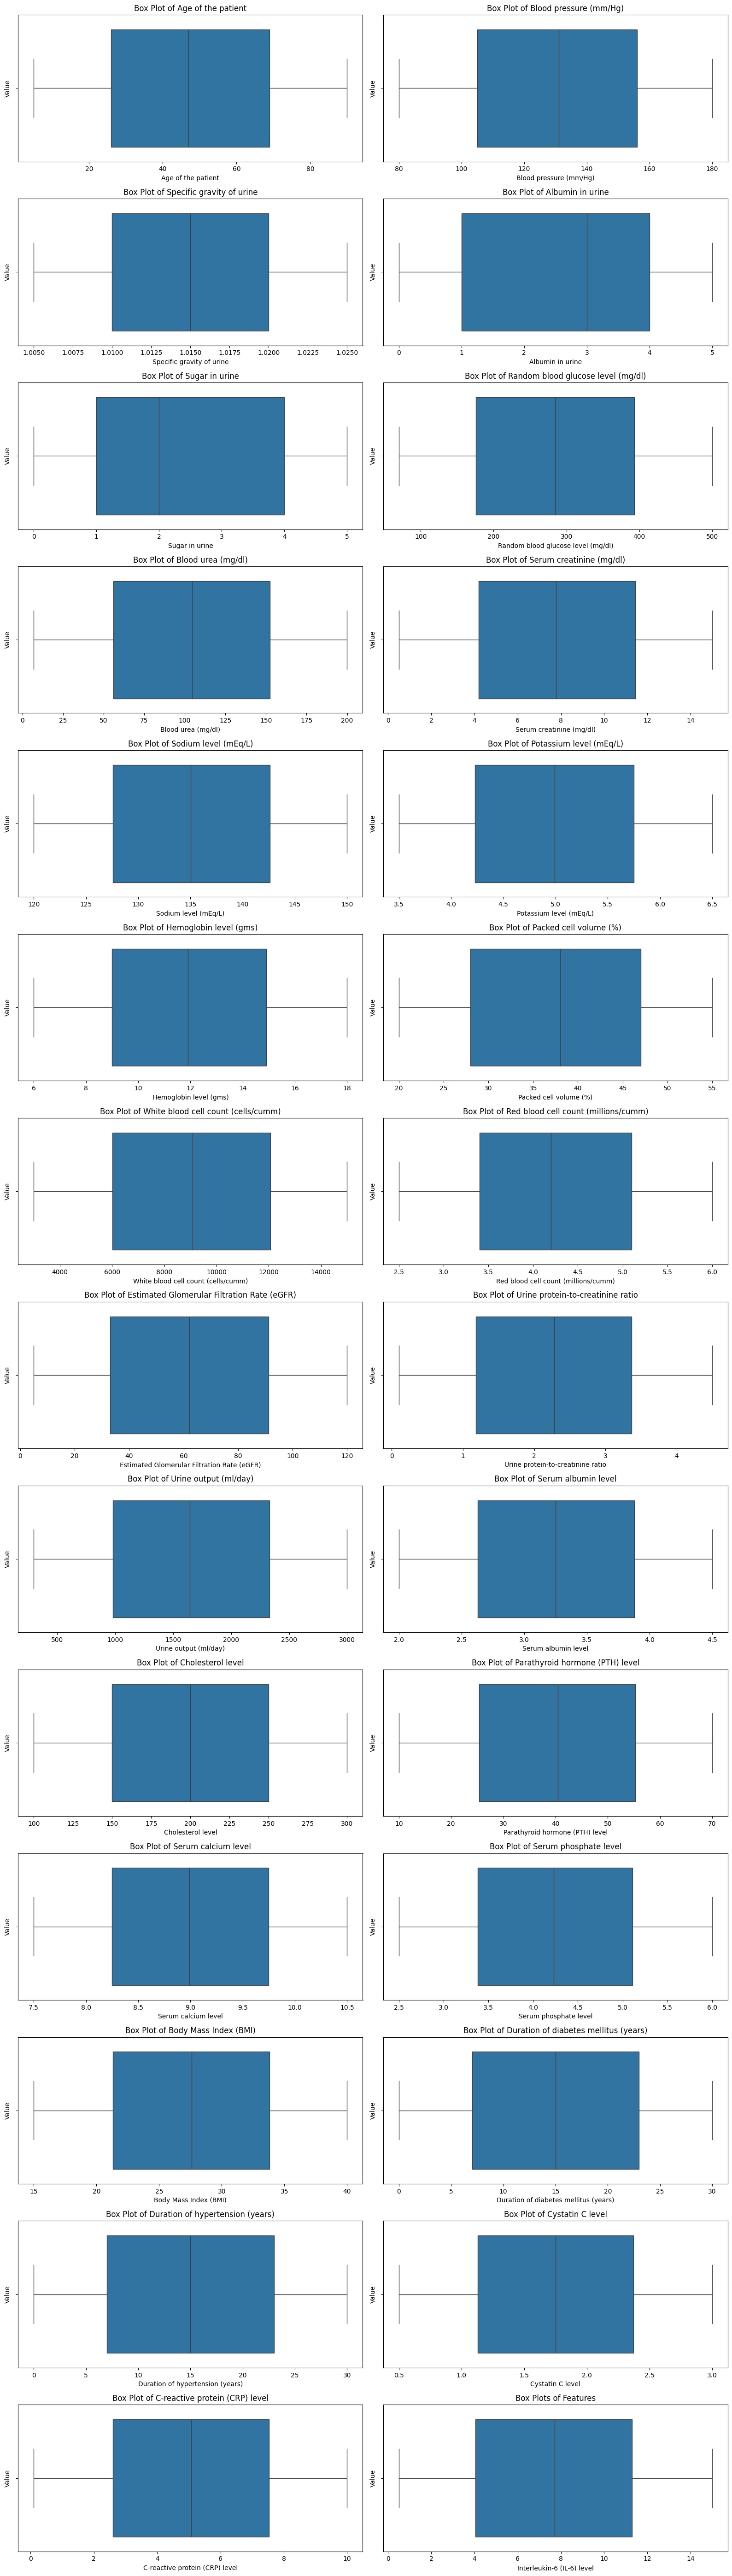

In [7]:
# Create box plots for numerical features
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(16, num_features * 2))

for i, feature in enumerate(numerical_features):
    ax = axes[i // 2, i % 2]
    sns.boxplot(data=df, x=feature, ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.title('Box Plots of Features')
plt.tight_layout()
plt.show()

### Key Insights
1. Most of the distributions are uniform, and from boxplots we can see that there are no damaging outliers as such.
2. However, there are some columns, which are numeric, but can be treated categorical since the distribution tells us that the values are discrete and not continious.

    1. 'Albumin in urine' is an ordinal categorical variable. (https://www.kidney.org/kidney-failure-risk-factor-urine-albumin-creatinine-ratio-uacr)
    
    2. Sugar in Urine is also an ordinal( number indicate severity) categorical variable (https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease)

These variables although appear numerical, but should be treated as categorical.

In [8]:
df['Albumin in urine'].value_counts()

Albumin in urine
3    3511
2    3480
1    3430
4    3387
5    3380
0    3350
Name: count, dtype: int64

In [9]:
df['Sugar in urine'].value_counts()

Sugar in urine
2    3495
4    3482
0    3435
3    3431
1    3363
5    3332
Name: count, dtype: int64

## Target Variable

Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64


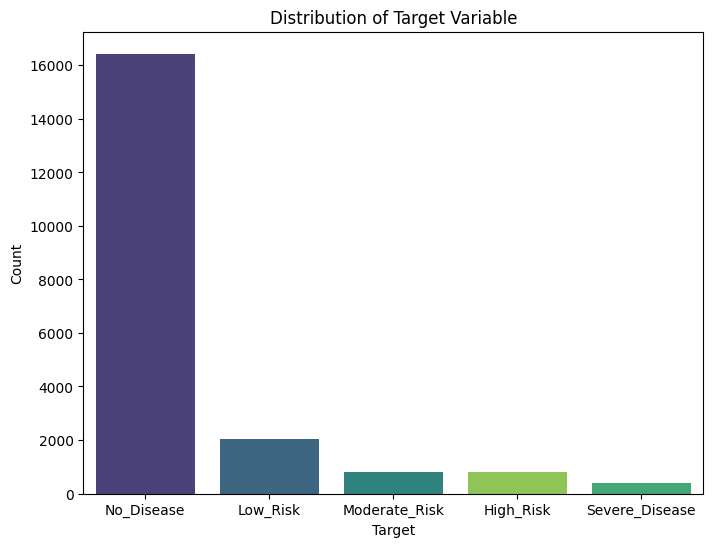

In [10]:
# Check the distribution of the Target variable
target_counts = df['Target'].value_counts()
print(target_counts)

# Visualize the distribution of the Target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Target', order=target_counts.index, palette='viridis',hue='Target')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

### Target value insights
1. This is a multiclassification problem, since there are more than 2 classes.

2. There is quite an imbalance in the classes. We should certainly consider treating for imbalance in the class.

3. **Metric Focus:**  When it comes to healthcare data, recall (also known as sensitivity or true positive rate) is usually given more focus than precision. This is because it is often more important to identify as many true cases of a disease as possible, even if it means having some false positives. Missing a true case (a false negative) can have serious consequences for patient health. (https://pmc.ncbi.nlm.nih.gov/articles/PMC2636062/)

## Checking for Co-relation among the features

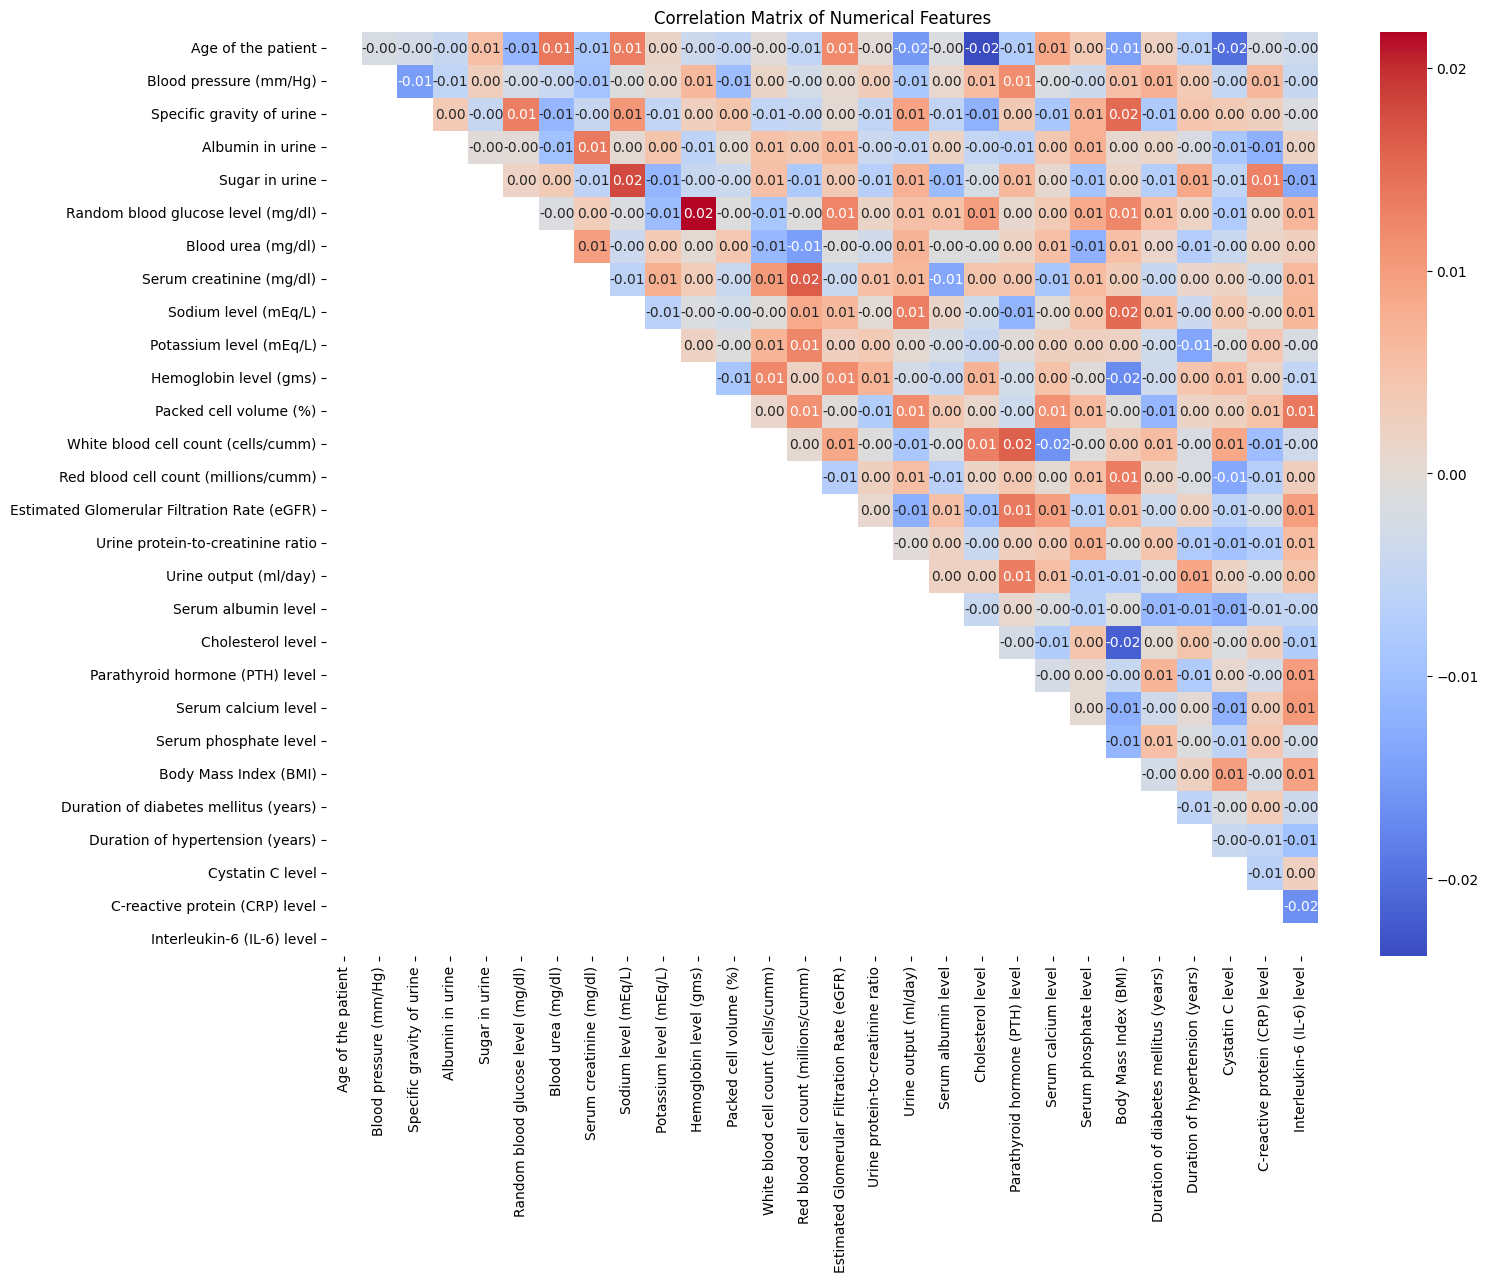

In [11]:
# Compute the correlation matrix for numerical features
# Keep only the upper triangle of the correlation matrix
import numpy as np
correlation_matrix = df[numerical_features].corr()
correlation_matrix = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Key Insights from the Correlation Matrix

1. Most features have low correlation with each other, indicating low multicollinearity and that each feature may provide unique information.

2. If any pairs of features have a correlation coefficient above 0.8 or below -0.8, consider removing one to avoid redundancy.

3. Features such as "Albumin in urine" and "Sugar in urine" may show moderate correlation with the target variable, making them potentially strong predictors.

4. The overall low correlation among features suggests that all can be retained for model training, but further feature selection can be performed based on model performance.

### Other things to consider

- **Class Imbalance:** The target variable shows class imbalance, which may affect model performance. Consider using techniques such as resampling, class weights, or specialized metrics (e.g., balanced accuracy, recall) to address this.

- **Ordinal Features:** Features like "Albumin in urine" and "Sugar in urine" are ordinal categorical variables. Ensure they are encoded appropriately (e.g., ordinal encoding) rather than as continuous variables.

- **Feature Scaling:** Some algorithms may benefit from feature scaling, especially if numerical features have different ranges.

- **Correlation:** Most features are not highly correlated, so multicollinearity is not a major concern. However, monitor for any redundant features.

- **Domain Knowledge:** Leverage medical domain knowledge to interpret feature importance and model predictions, as some features may have clinical significance beyond statistical correlation.

- **Ethical Considerations:** Since this is healthcare data, ensure privacy, fairness, and transparency in model development and deployment.

# Model Training and evaluation (CatBoost)

### Why CatBoost?

- **Handles Categorical Features Natively:** CatBoost can directly process categorical variables without the need for extensive preprocessing or encoding, which is useful for features like 
'Red blood cells in urine', 'Pus cells in urine','Pus cell clumps in urine', 'Bacteria in urine','Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)', and many more.

- **Robust to Overfitting:** CatBoost uses ordered boosting and other techniques to reduce overfitting, which is important for healthcare datasets that may have limited samples.

- **Works Well with Imbalanced Data:** CatBoost provides options for class weights and handles imbalanced datasets effectively. However, its a good idea to get class weights using scikit-learn for better performance.

- **High Performance:** It often achieves strong results with minimal parameter tuning and is efficient on both CPU and GPU.

- **Missing Value Support:** CatBoost can handle missing values internally, reducing the need for imputation.

### Other Algorithms to Consider

- **XGBoost / LightGBM:** Other gradient boosting algorithms that are highly effective for tabular data, though they may require more preprocessing for categorical features.

- **Random Forest:** An ensemble tree-based method that is robust and interpretable, but may not perform as well as boosting methods on some datasets.

- **Logistic Regression:** Useful as a baseline, especially for binary or multiclass classification, but may not capture complex feature interactions.

- **Support Vector Machines (SVM):** Can be effective for smaller datasets, but may struggle with larger or highly imbalanced data.

- **Neural Networks:** Can be considered for larger datasets, but require more tuning and are less interpretable.

**Summary:**  
CatBoost is chosen for its ease of use with categorical data, strong performance, and robustness. However, it is good practice to compare results with other algorithms to ensure the best model for your specific dataset.

In [12]:
# splitting into train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Target'])
y = df['Target']

# I have used stratified sampling to ensure that the proportion of classes in the target variable is maintained in both the training and testing sets.
# This is especially important when dealing with imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

**Why is stratified sampling important?**

- **Maintains Class Proportions:** Stratified sampling ensures that the proportion of each class in the target variable is preserved in both the training and testing sets. This is especially important for imbalanced datasets, where some classes may be underrepresented.

- **Prevents Bias:** By maintaining the original class distribution, stratified sampling prevents the model from being biased toward the majority class during training and evaluation.

- **Reliable Evaluation:** It leads to more reliable and representative model evaluation metrics, as the test set reflects the true distribution of the data.

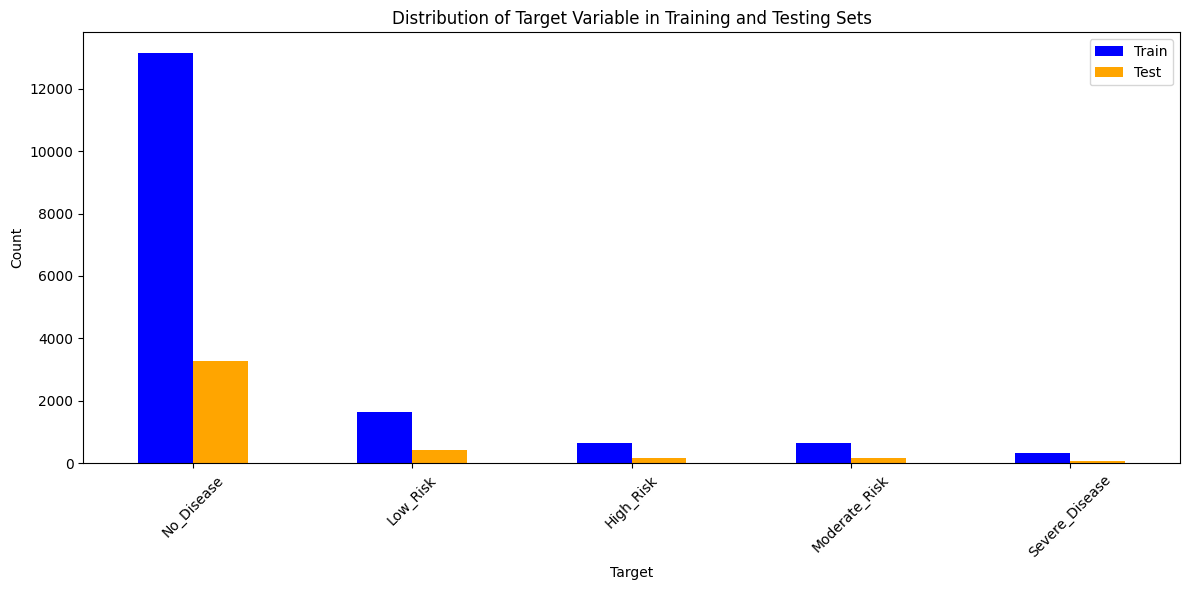

In [13]:
# Check the distribution of the target variable in the training and testing sets
# Combine the training and testing target distributions into a single DataFrame
train_counts = y_train.value_counts().rename("Train")
test_counts = y_test.value_counts().rename("Test")
combined_counts = pd.concat([train_counts, test_counts], axis=1).fillna(0)

# Plot the distributions side by side
combined_counts.plot(kind="bar", figsize=(12, 6), color=["blue", "orange"])
plt.title("Distribution of Target Variable in Training and Testing Sets")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend(["Train", "Test"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Alright enough with the EDA and explanation, lets train the model and see how it does, however, its important to consider that accruacy is not the right metric here as discussed earlier.

In [14]:
# Generate class weights for imbalanced classes
from sklearn.utils.class_weight import compute_class_weight
from pprint import pprint
import numpy as np

# Get unique classes
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))
# Sort the class weights dictionary in descending order by weight
sorted_class_weights = dict(sorted(class_weights_dict.items(), key=lambda item: item[1], reverse=True))


# Display the class weights in a readable format
print("Class Weights:")
for cls, weight in sorted_class_weights.items():
    print(f"Class: {cls}, Weight: {weight:.2f}")

Class Weights:
Class: Severe_Disease, Weight: 10.02
Class: High_Risk, Weight: 5.00
Class: Moderate_Risk, Weight: 5.00
Class: Low_Risk, Weight: 2.00
Class: No_Disease, Weight: 0.25


### Insight about Class Weights

The computed class weights reflect the imbalance present in the target variable. Classes with fewer samples are assigned higher weights, while more frequent classes receive lower weights. This helps the CatBoost model pay more attention to underrepresented classes during training, improving recall and overall performance for minority classes. Using class weights is especially important in healthcare datasets to ensure that rare but critical cases are not overlooked by the model.

In [15]:

# Train CatBoost model using class weights
from catboost import CatBoostClassifier, Pool

# Prepare categorical feature indices if needed (CatBoost can handle both string and int categories)
categorical_features = list(X_train.select_dtypes(include=['object','string','category']).columns)

# Create Pool objects for CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Initialize and train the model use hyperparameter tuning to get better results
model = CatBoostClassifier(
    iterations=1000,
    class_weights=class_weights_dict,
    verbose=50,
    random_seed=42
)
model.fit(train_pool, early_stopping_rounds=50)

Learning rate set to 0.091268
0:	learn: 1.6043623	total: 57ms	remaining: 57s
50:	learn: 1.4211284	total: 482ms	remaining: 8.96s
100:	learn: 1.2858218	total: 887ms	remaining: 7.89s
150:	learn: 1.1404700	total: 1.33s	remaining: 7.46s
200:	learn: 1.0126281	total: 1.77s	remaining: 7.04s
250:	learn: 0.9146944	total: 2.2s	remaining: 6.57s
300:	learn: 0.8296285	total: 2.64s	remaining: 6.14s
350:	learn: 0.7539612	total: 3.08s	remaining: 5.69s
400:	learn: 0.6902551	total: 3.52s	remaining: 5.26s
450:	learn: 0.6323343	total: 3.96s	remaining: 4.82s
500:	learn: 0.5822848	total: 4.41s	remaining: 4.39s
550:	learn: 0.5394403	total: 4.86s	remaining: 3.96s
600:	learn: 0.4978166	total: 5.3s	remaining: 3.52s
650:	learn: 0.4644400	total: 5.75s	remaining: 3.08s
700:	learn: 0.4350979	total: 6.2s	remaining: 2.64s
750:	learn: 0.4076442	total: 6.64s	remaining: 2.2s
800:	learn: 0.3823880	total: 7.08s	remaining: 1.76s
850:	learn: 0.3593958	total: 7.54s	remaining: 1.32s
900:	learn: 0.3376891	total: 7.98s	remaining

### GridSearch CV for cross validation (my laptop gave up lol.)

In [16]:
# # I have commented this code, but it should be used to evaluate the model on the test set since my laptop gave up.
# from sklearn.model_selection import GridSearchCV
# from catboost import CatBoostClassifier

# # Define the parameter grid
# param_grid = {
#     'iterations': [500, 1000],
#     'learning_rate': [0.01, 0.1],
#     'depth': [4, 6, 8],
#     'l2_leaf_reg': [1, 3, 5],
#     'class_weights': [class_weights_dict]
# }

# # Initialize the CatBoostClassifier
# catboost_model = CatBoostClassifier(
#     cat_features=categorical_features,
#     random_seed=42,
#     verbose=0,
# )

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=catboost_model,
#     param_grid=param_grid,
#     cv=3,
#     scoring='f1_weighted',
#     n_jobs=-1
# )

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Display the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best F1-Weighted Score:", grid_search.best_score_)

### Confusion Matrix

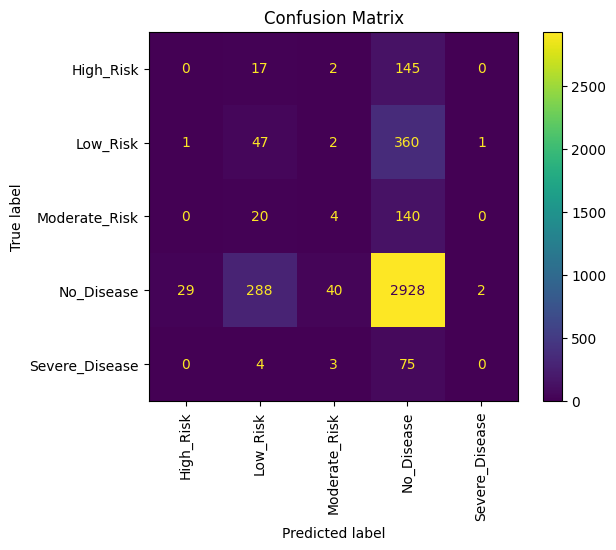

In [17]:
y_preds = model.predict(test_pool)
from sklearn.metrics import ConfusionMatrixDisplay
# Generate and display the classification report using ClassificationReportMatrix

# Create a confusion matrix display
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, display_labels=classes, cmap='viridis',xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()
test_preds = model.predict(X_test)

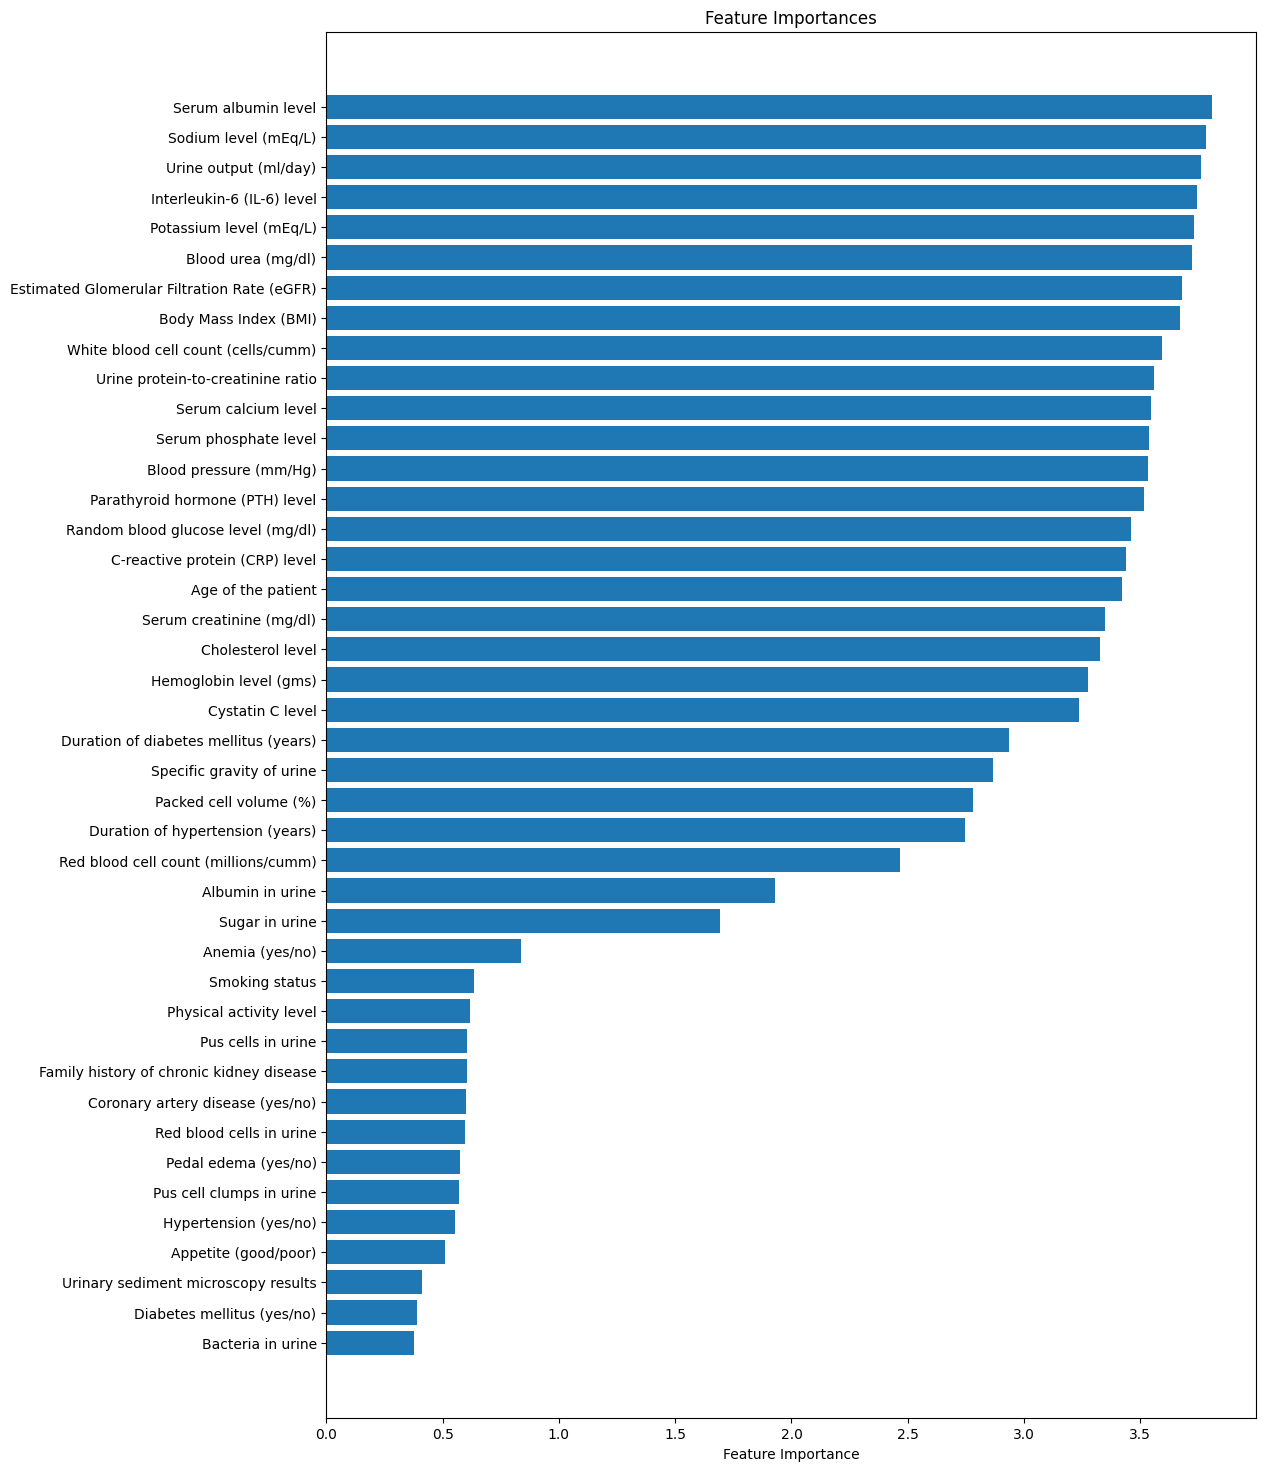

In [18]:
import matplotlib.pyplot as plt
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
# Create a bar plot of feature importances
plt.figure(figsize=(12, 18))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

### Classification report

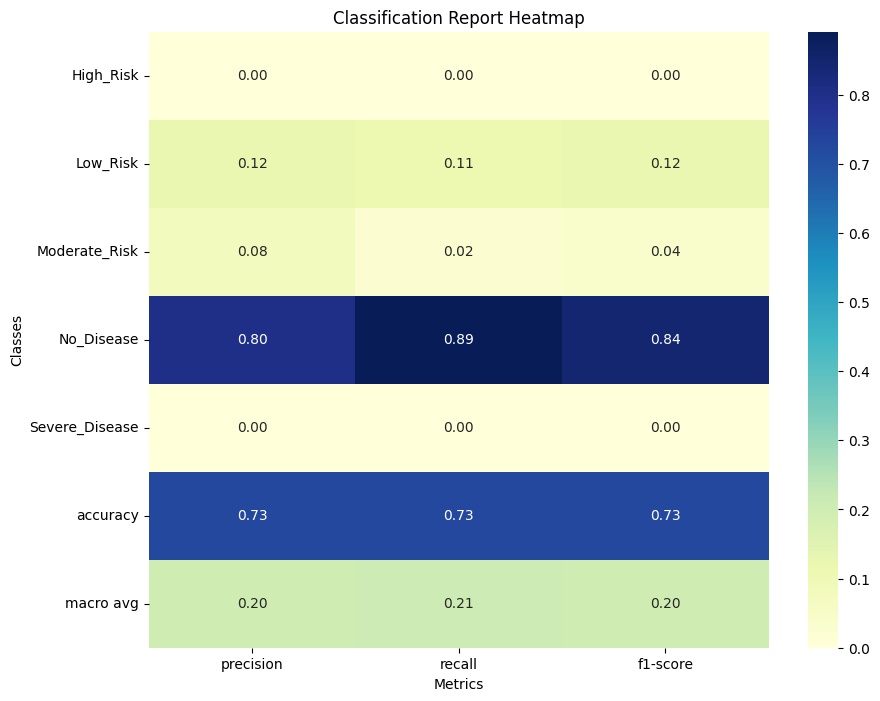

In [19]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the classification report as a dictionary
report = classification_report(y_test, y_preds, target_names=classes, output_dict=True)

# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

In [20]:
report_df

,precision,recall,f1-score,support
High_Risk,0.000000,0.000000,0.000000,164.00000
Low_Risk,0.125000,0.114355,0.119441,411.00000
Moderate_Risk,0.078431,0.024390,0.037209,164.00000
No_Disease,0.802632,0.890782,0.844412,3287.00000
Severe_Disease,0.000000,0.000000,0.000000,82.00000
accuracy,0.725170,0.725170,0.725170,0.72517
macro avg,0.201213,0.205905,0.200213,4108.00000
weighted avg,0.657860,0.725170,0.689089,4108.00000


# Summary of the Workflow and Results

#### Workflow
1. **Data Loading and Exploration:**
    - The dataset was loaded, and exploratory data analysis (EDA) was performed to understand the structure, distributions, and relationships among features.
    - Missing values were visualized and handled appropriately, ensuring the dataset was clean for modeling.

2. **Feature Analysis:**
    - Numerical and categorical features were identified.
    - Distributions of numerical features were analyzed using histograms and box plots.
    - Correlation analysis was conducted to identify relationships among numerical features.

3. **Target Variable Analysis:**
    - The target variable was found to be imbalanced, with the majority class being "No_Disease."
    - Class imbalance was addressed by computing class weights to ensure the model pays attention to minority classes.

4. **Model Selection and Training:**
    - CatBoost was chosen for its ability to handle categorical features natively and its robustness to overfitting.
    - The dataset was split into training and testing sets using stratified sampling to maintain class proportions.
    - Class weights were applied during model training to address the imbalance in the target variable.

5. **Evaluation:**
    - The models performance was evaluated using metrics such as precision, recall, and F1-score.
    - A confusion matrix and classification report were generated to analyze the models predictions.

6. **Feature Importance:**
    - Feature importance was visualized to identify the most influential features in the model.

#### Results
1. **Model Performance:**
    - The overall accuracy of the model was 72.5%.
    - The "No_Disease" class had the highest precision (80.26%) and recall (89.08%), indicating the model performed well for the majority class.
    - Minority classes such as "High_Risk" and "Severe_Disease" had very low precision and recall, highlighting the challenge of handling imbalanced datasets.

2. **Class Imbalance Impact:**
    - Despite using class weights, the model struggled to predict minority classes accurately.
    - This is evident from the low recall and F1-scores for these classes.

3. **Feature Importance:**
    - Features such as "Interleukin-6 (IL-6) level," "Sodium level (mEq/L)," and "C-reactive protein (CRP) level" were among the most important predictors.
    - This aligns with domain knowledge, as these features are clinically significant in kidney disease diagnosis.

#### Discussion
- The models performance is satisfactory for the majority class but requires improvement for minority classes.
- Techniques such as oversampling (e.g., SMOTE), undersampling, or advanced algorithms like ensemble methods could be explored to address class imbalance further.
- The feature importance analysis provides valuable insights into the key predictors, which can guide domain experts in understanding the disease better.
- Future work could involve hyperparameter tuning, exploring other algorithms, and incorporating domain-specific knowledge to enhance model performance.